In [6]:
from improc import PGM
import matplotlib.pyplot as plt
import numpy as np

# Figure 3.38

#### Loading the file

In [7]:
img_path: str = "./images/"

pgm3_38 = PGM.read("".join([img_path, "fig-3_38.pgm"]))

#### Defining windows

In [8]:
# Blur window. This can be done by np.ones() as well, I wanted to show it this way
blurr_w = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) / 9

# Laplacian window.
laplacian_w = np.array([
    [0,  1,  0],
    [1, -4,  1],
    [0,  1,  0]
])

# Identity - laplacian window.
id_lapl_w = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])

#### Filtering / correcting images

In [9]:
# Original Image
pgm3_38_original = pgm3_38.to_ndarray()

# Blurred Moon
pgm3_38_blurred = pgm3_38.convol(blurr_w).to_ndarray()

# Laplacian Filter
pgm3_38_lapl = pgm3_38.convol(laplacian_w).to_ndarray() 
# Absolute value of Laplacian Filter
pgm3_38_lapl = np.abs(pgm3_38_lapl)

# Laplacian Filter with scaling:
# I defined a keyword argument named point to change the scale. 
pgm3_38_laplscl = pgm3_38.convol(
    laplacian_w,    # The window to apply 
    point=127       # 127 for the middle of 255
).to_ndarray() 

### Plotting

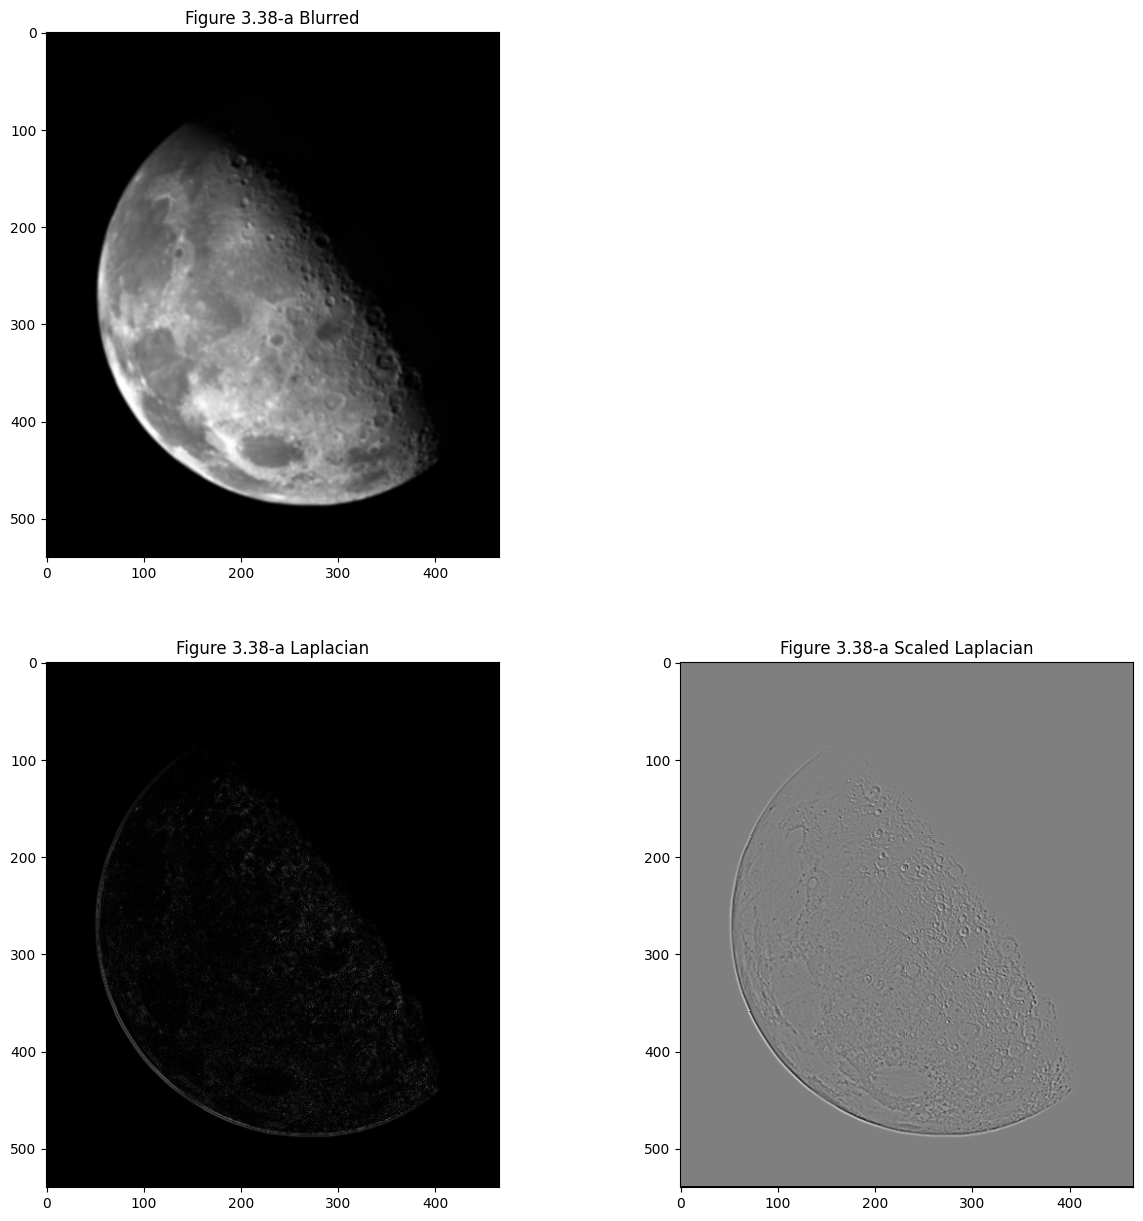

In [10]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.imshow(pgm3_38_blurred, cmap="gray", vmin=0, vmax=255)
plt.title("Figure 3.38-a Blurred")

plt.subplot(2, 2, 3)
plt.imshow(pgm3_38_lapl, cmap="gray", vmin=0, vmax=255)
plt.title("Figure 3.38-a Laplacian")

plt.subplot(2, 2, 4)
plt.imshow(pgm3_38_laplscl, cmap="gray", vmin=0, vmax=255)
plt.title("Figure 3.38-a Scaled Laplacian")

plt.show()